In [30]:
from dasQt import das

In [1]:

import os
os.environ['http_proxy'] = "http://127.0.0.1:7890"
os.environ['https_proxy'] = "http://127.0.0.1:7890"
import obspy

st = obspy.read("https://examples.obspy.org/ev0_6.a01.gse2")
st = st.select(component="Z")


tr = st[0]
df = tr.stats.sampling_rate

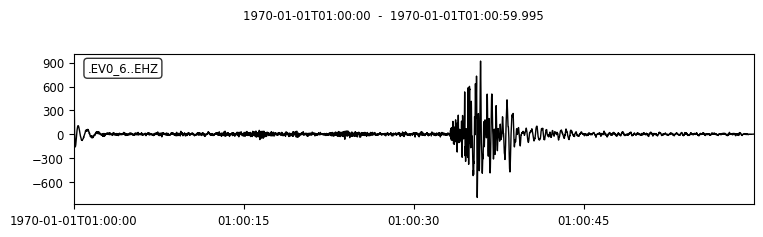

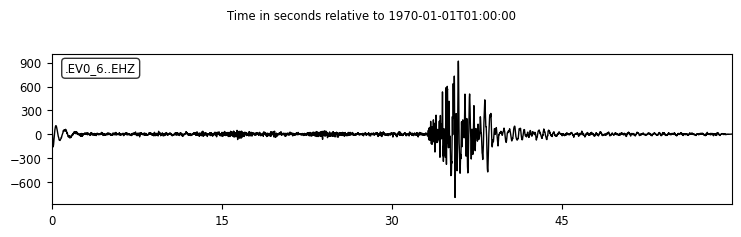

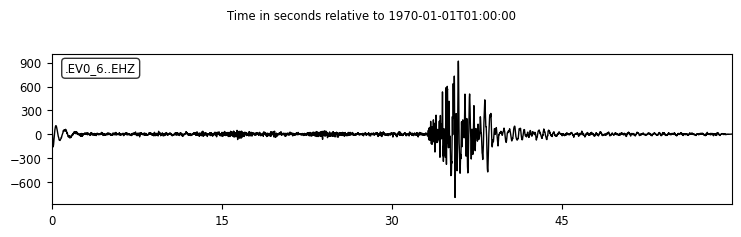

In [2]:
tr.plot()
tr.plot(type="relative")

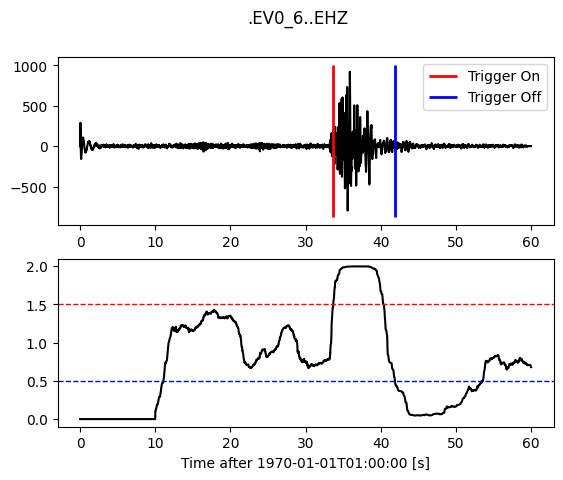

In [3]:
## Classic Sta Lta

from obspy.signal.trigger import classic_sta_lta, plot_trigger

cft = classic_sta_lta(tr.data, int(5 * df), int(10 * df))
plot_trigger(tr, cft, 1.5, 0.5)

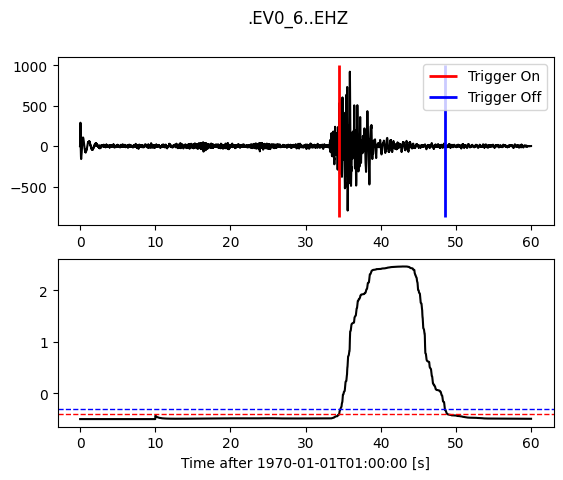

In [4]:
## Z-Detect

from obspy.signal.trigger import z_detect
cft = z_detect(tr.data, int(10 * df))
plot_trigger(tr, cft, -0.4, -0.3)

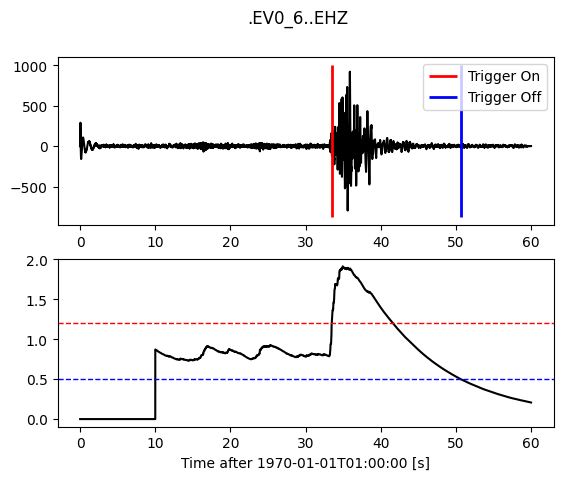

In [5]:
## Recursive Sta Lta

from obspy.signal.trigger import recursive_sta_lta
cft = recursive_sta_lta(tr.data, int(5 * df), int(10 * df))
plot_trigger(tr, cft, 1.2, 0.5)

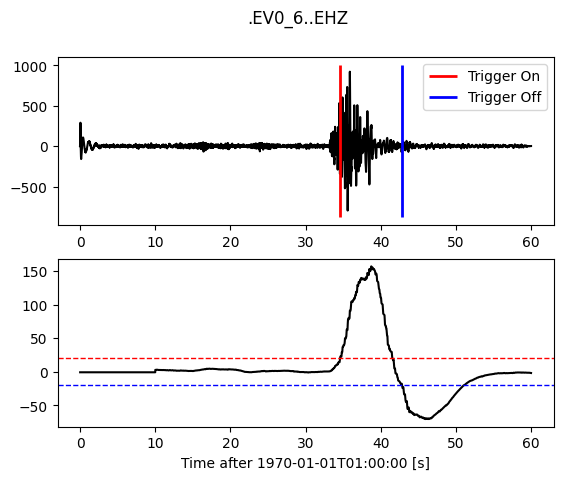

In [6]:
## Carl-Sta-Trig

from obspy.signal.trigger import carl_sta_trig
cft = carl_sta_trig(tr.data, int(5 * df), int(10 * df), 0.8, 0.8)
plot_trigger(tr, cft, 20.0, -20.0)

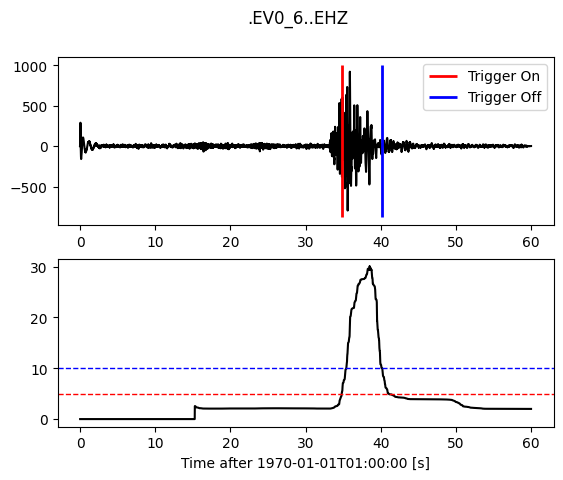

In [7]:
## Delayed Sta Lta

from obspy.signal.trigger import delayed_sta_lta
cft = delayed_sta_lta(tr.data, int(5 * df), int(10 * df))
plot_trigger(tr, cft, 5, 10)

In [8]:
from obspy.core import Stream, read
st = Stream()
files = ["BW.UH1..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH2..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH3..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH4..SHZ.D.2010.147.cut.slist.gz"]
for filename in files:
    st += read("https://examples.obspy.org/" + filename)

In [9]:
st.filter('bandpass', freqmin=10, freqmax=20)  # optional prefiltering
from obspy.signal.trigger import coincidence_trigger
st2 = st.copy()
trig = coincidence_trigger("recstalta", 3.5, 1, st2, 3, sta=0.5, lta=10)

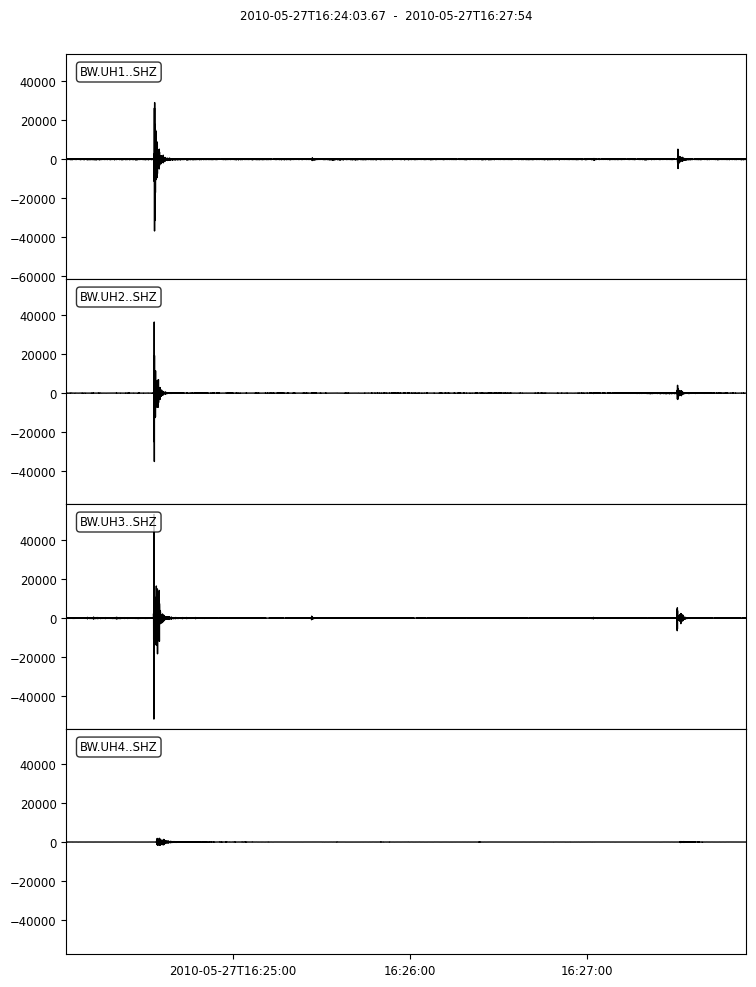

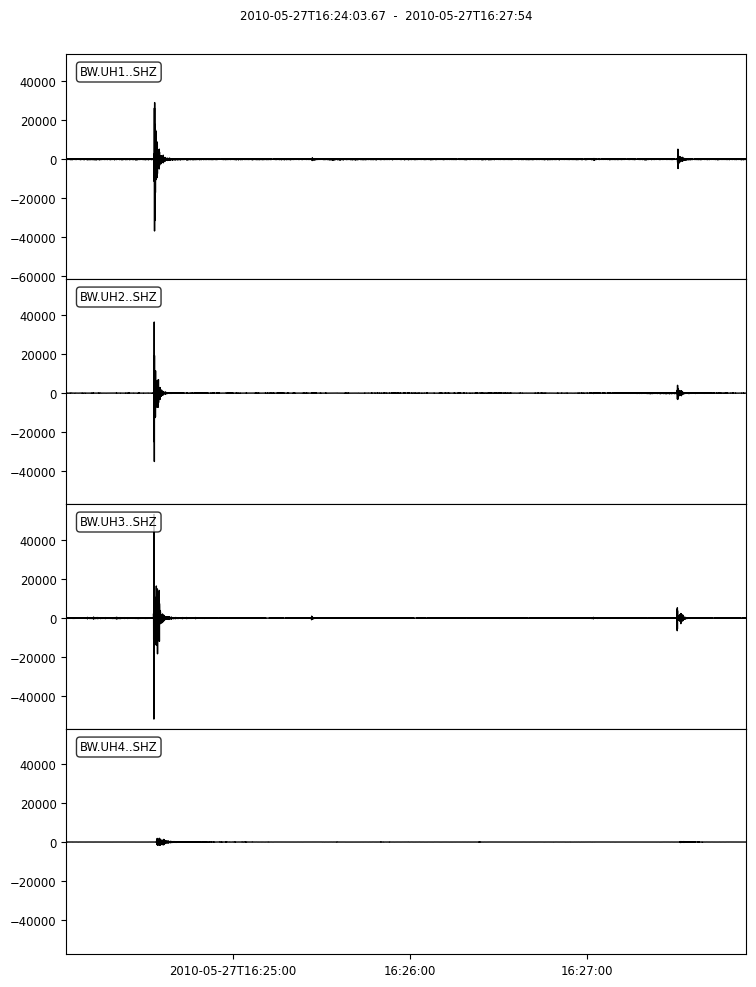

In [10]:
st.plot()

In [11]:
from pprint import pprint
pprint(trig)

[{'coincidence_sum': 4.0,
  'duration': 4.510000228881836,
  'similarity': {},
  'stations': ['UH3', 'UH2', 'UH1', 'UH4'],
  'time': UTCDateTime(2010, 5, 27, 16, 24, 33, 210000),
  'trace_ids': ['BW.UH3..SHZ', 'BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH4..SHZ']},
 {'coincidence_sum': 3.0,
  'duration': 3.440000057220459,
  'similarity': {},
  'stations': ['UH2', 'UH3', 'UH1'],
  'time': UTCDateTime(2010, 5, 27, 16, 27, 1, 260000),
  'trace_ids': ['BW.UH2..SHZ', 'BW.UH3..SHZ', 'BW.UH1..SHZ']},
 {'coincidence_sum': 4.0,
  'duration': 4.769999742507935,
  'similarity': {},
  'stations': ['UH3', 'UH2', 'UH1', 'UH4'],
  'time': UTCDateTime(2010, 5, 27, 16, 27, 30, 510000),
  'trace_ids': ['BW.UH3..SHZ', 'BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH4..SHZ']}]


Text(0, 0.5, 'BW.UH4')

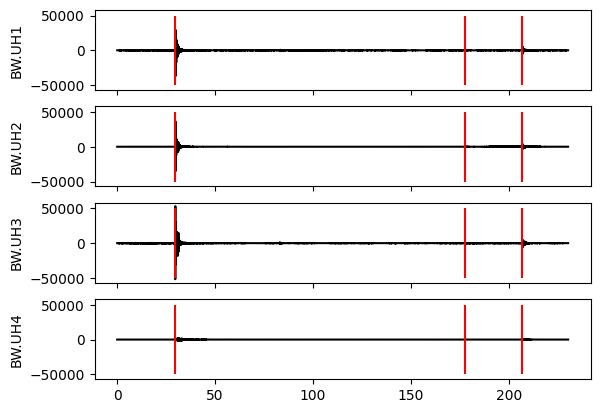

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, sharey=True)

# ax1.plot_date(mdates.date2num(st[0].times("utcdatetime")), st[0].data, 'k')
ax1.plot(st[0].times(), st[0].data, 'k')
ax1.vlines(trig[0]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax1.vlines(trig[1]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax1.vlines(trig[2]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax1.set_ylabel('BW.UH1')
# ax1.set_xticklabels(st[0].times("utcdatetime"), rotation=315)

ax2.plot(st[1].times(), st[1].data, 'k')
ax2.vlines(trig[0]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax2.vlines(trig[1]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax2.vlines(trig[2]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax2.set_ylabel('BW.UH2')
# ax2.set_xticklabels(st[1].times("utcdatetime"), rotation=315)

ax3.plot(st[2].times(), st[2].data, 'k')
ax3.vlines(trig[0]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax3.vlines(trig[1]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax3.vlines(trig[2]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax3.set_ylabel('BW.UH3')
# ax3.set_xticklabels(st[2].times("utcdatetime"), rotation=315)

ax4.plot(st[3].times(), st[3].data, 'k')
ax4.vlines(trig[0]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax4.vlines(trig[1]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax4.vlines(trig[2]['time']-st[0].stats.starttime, -50000, 50000, color='r')
ax4.set_ylabel('BW.UH4')
# ax4.set_xticklabels(st[3].times("utcdatetime"), rotation=315)

In [13]:
st2 = st.copy()
trig = coincidence_trigger("recstalta", 3.5, 1, st2, 3, sta=0.5, lta=10,
                          details=True)

In [14]:
len(trig)


3

In [15]:
pprint(trig[0])

{'cft_peak_wmean': 19.60794408226692,
 'cft_peaks': [19.71981920457211,
               19.872432918501264,
               19.622171410201297,
               19.217352795793],
 'cft_std_wmean': 5.449737187325091,
 'cft_stds': [5.2651551929356595,
              5.6565387957966395,
              5.75822489736985,
              5.119029863198215],
 'coincidence_sum': 4.0,
 'duration': 4.510000228881836,
 'similarity': {},
 'stations': ['UH3', 'UH2', 'UH1', 'UH4'],
 'time': UTCDateTime(2010, 5, 27, 16, 24, 33, 210000),
 'trace_ids': ['BW.UH3..SHZ', 'BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH4..SHZ']}


In [16]:
from obspy.core import Stream, read, UTCDateTime
st = Stream()
files = ["BW.UH1..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH2..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH3..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH3..SHN.D.2010.147.cut.slist.gz",
         "BW.UH3..SHE.D.2010.147.cut.slist.gz",
         "BW.UH4..SHZ.D.2010.147.cut.slist.gz"]
for filename in files:
    st += read("https://examples.obspy.org/" + filename)
st.filter('bandpass', freqmin=10, freqmax=20)  # optional prefiltering

6 Trace(s) in Stream:
BW.UH1..SHZ | 2010-05-27T16:24:03.679998Z - 2010-05-27T16:27:53.999998Z | 50.0 Hz, 11517 samples
BW.UH2..SHZ | 2010-05-27T16:24:03.680000Z - 2010-05-27T16:27:54.000000Z | 50.0 Hz, 11517 samples
BW.UH3..SHZ | 2010-05-27T16:24:03.670000Z - 2010-05-27T16:27:53.990000Z | 50.0 Hz, 11517 samples
BW.UH3..SHN | 2010-05-27T16:24:03.669999Z - 2010-05-27T16:27:53.989999Z | 50.0 Hz, 11517 samples
BW.UH3..SHE | 2010-05-27T16:24:03.669999Z - 2010-05-27T16:27:53.989999Z | 50.0 Hz, 11517 samples
BW.UH4..SHZ | 2010-05-27T16:24:03.680000Z - 2010-05-27T16:27:54.000000Z | 50.0 Hz, 11517 samples

In [17]:
times = ["2010-05-27T16:24:33.095000", "2010-05-27T16:27:30.370000"]
event_templates = {"UH3": []}
for t in times:
    t = UTCDateTime(t)
    st_ = st.select(station="UH3").slice(t, t + 2.5)
    event_templates["UH3"].append(st_)
t = UTCDateTime("2010-05-27T16:27:30.574999")
st_ = st.select(station="UH1").slice(t, t + 2.5)
event_templates["UH1"] = [st_]

In [18]:
from obspy.signal.trigger import coincidence_trigger
st2 = st.copy()
trace_ids = {"BW.UH1..SHZ": 1,
             "BW.UH2..SHZ": 1,
             "BW.UH3..SHZ": 1,
             "BW.UH4..SHZ": 1}
similarity_thresholds = {"UH1": 0.8, "UH3": 0.7}
trig = coincidence_trigger("classicstalta", 5, 1, st2, 4, sta=0.5,
                          lta=10, trace_ids=trace_ids,
                          event_templates=event_templates,
                          similarity_threshold=similarity_thresholds)

/Users/zhiyuzhang/MyProjects/dasQt/.venv/lib/python3.11/site-packages/obspy/signal/trigger.py:712: UserWarning: At least one trace's ID was not found in the trace ID list and was disregarded (BW.UH3..SHN)
  warnings.warn(msg, UserWarning)
/Users/zhiyuzhang/MyProjects/dasQt/.venv/lib/python3.11/site-packages/obspy/signal/trigger.py:712: UserWarning: At least one trace's ID was not found in the trace ID list and was disregarded (BW.UH3..SHE)
  warnings.warn(msg, UserWarning)


In [19]:
from pprint import pprint
pprint(trig)

[{'coincidence_sum': 4.0,
  'duration': 4.110000133514404,
  'similarity': {'UH1': 0.9414944738498273, 'UH3': 1.0},
  'stations': ['UH3', 'UH2', 'UH1', 'UH4'],
  'time': UTCDateTime(2010, 5, 27, 16, 24, 33, 210000),
  'trace_ids': ['BW.UH3..SHZ', 'BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH4..SHZ']},
 {'coincidence_sum': 3.0,
  'duration': 1.9900000095367432,
  'similarity': {'UH1': 0.6522820457057775, 'UH3': 0.7267929342921434},
  'stations': ['UH3', 'UH1', 'UH2'],
  'time': UTCDateTime(2010, 5, 27, 16, 25, 26, 710000),
  'trace_ids': ['BW.UH3..SHZ', 'BW.UH1..SHZ', 'BW.UH2..SHZ']},
 {'coincidence_sum': 3.0,
  'duration': 1.9200000762939453,
  'similarity': {'UH1': 0.8940445877433804, 'UH3': 0.7458140937142531},
  'stations': ['UH2', 'UH1', 'UH3'],
  'time': UTCDateTime(2010, 5, 27, 16, 27, 2, 260000),
  'trace_ids': ['BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH3..SHZ']},
 {'coincidence_sum': 4.0,
  'duration': 4.029999732971191,
  'similarity': {'UH1': 1.0, 'UH3': 1.0},
  'stations': ['UH3', 'UH2', '

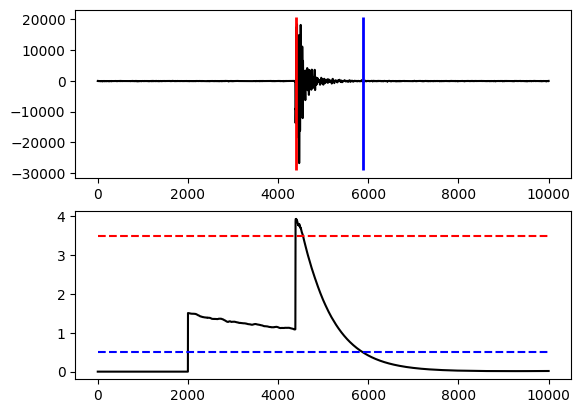

In [20]:
import matplotlib.pyplot as plt

import obspy
from obspy.clients.fdsn import Client
from obspy.signal.trigger import recursive_sta_lta, trigger_onset


# Retrieve waveforms via FDSNWS
client = Client("LMU")
t = obspy.UTCDateTime("2009-08-24 00:19:45")
st = client.get_waveforms('BW', 'RTSH', '', 'EHZ', t, t + 50)

# For convenience
tr = st[0]  # only one trace in mseed volume
df = tr.stats.sampling_rate

# Characteristic function and trigger onsets
cft = recursive_sta_lta(tr.data, int(2.5 * df), int(10. * df))
on_of = trigger_onset(cft, 3.5, 0.5)

# Plotting the results
ax = plt.subplot(211)
plt.plot(tr.data, 'k')
ymin, ymax = ax.get_ylim()
plt.vlines(on_of[:, 0], ymin, ymax, color='r', linewidth=2)
plt.vlines(on_of[:, 1], ymin, ymax, color='b', linewidth=2)
plt.subplot(212, sharex=ax)
plt.plot(cft, 'k')
plt.hlines([3.5, 0.5], 0, len(cft), color=['r', 'b'], linestyle='--')
plt.axis('tight')
plt.show()

In [20]:
import sys
sys.path.insert(0, '../')
from dasQt import das
import pathlib

dir_path = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/2024-02-01')
files = sorted(dir_path.glob('*.dat'))
file = files[50]
das1 = das.DAS()
das1.readData(file)
# das1.RawDataBpFilter(0.01, 0.02, 2.0, 2.1)
data = das1.data[:, 73:-1]

2024-03-19 20:10:17,908 INFO	das: 153	
2024-02-01-08-23-44-out.dat read done!


In [69]:
# -*- coding: utf-8 -*-
import math
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
 
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
 
 
# ---------------------基线校正---------------------------------#
def Baseline_correction_JK(t, acceleration_g):
    # dt - ----采样时间
    # acc - ---待滤波时程记录
    # n - -----滤波阶数
    # f_low - -滤波的低频截止频率
    # f_high - 滤波的高频截止频率
    fn = 1000
    dt = 1/fn
    n = 4
    f_low = 1
    f_high = 249
    T = np.arange(dt, dt * len(t) + dt, dt)
    end = len(acceleration_g) - 1
    vel = np.cumsum(acceleration_g) * dt
    dis = np.cumsum(vel) * dt
    temp = np.cumsum(dis * (3 * T[end] * T ** 2 - 2 * T ** 3)) * dt
    a1 = 28 / 13 * (1 / (T[end] ** 2)) * (2 * vel[end] - 15 / (T[end] ** 5) * temp[end])
    a0 = vel[end] / T[end] - a1 * T[end] / 2
    acc_correction = acceleration_g - (a0 + a1 * T)
    acc_correction_t = pd.DataFrame({'T/s': t, 'Acc/g': acc_correction})
    acc_correction_t.to_excel('acc_correction.xlsx', index=False)  # 输出基线校正后的地震动数据
    # vel_correction = np.cumsum(acc_correction) * dt
    # dis_correction = np.cumsum(vel_correction) * dt
    # Response_spectrum(acc_correction, t[1]-t[0])
    # Time_history_curve(acc_correction, t, t[1]-t[0])
    Butterworth_filter_JK(dt, acc_correction, n, t, f_low, f_high)
 

# --------------------Butterworth滤波器因果滤波器---------------------------------#
def Butterworth_filter_JK(dt, acc, n,t ,f_low=None, f_high=None):
    # dt - ----采样时间
    # acc - ---待滤波时程记录
    # n - -----滤波阶数
    # f_low - -滤波的低频截止频率
    # f_high - 滤波的高频截止频率
    df = 1 / dt
    if f_high is None:
        # 低通滤波器
        F1 = f_low / (df / 2)
        b, a = signal.butter(n, F1, 'low')
    elif f_low is None:
        # 高通滤波器
        F2 = f_high / (df / 2)
        [b, a] = signal.butter(n, F2, 'high')
    else:
        # 带通滤波器
        F1 = f_low / (df / 2)
        F2 = f_high / (df / 2)
        b, a = signal.butter(n, [F1, F2], 'bandpass')
    acc_filter = signal.filtfilt(b, a, acc)
    # vel_filter = np.cumsum(acc_filter) * dt
    # dis_filter = np.cumsum(vel_filter) * dt
    acc_filter_t = pd.DataFrame({'T/s': t, 'Acc/g': acc_filter})
    acc_filter_t.to_excel('acc_filter.xlsx', index=False)  # 输出基线校正、滤波后的地震动数据
    # Response_spectrum(acc_filter, t[1]-t[0])
    # Time_history_curve(acc_filter, t, t[1]-t[0])
 
 
# ---------------------NewMark方法，β取1/6----------------------- #
def NewMark(acceleration_g: list, step, period):  # 地面加速度(单位：m/s^2)，积分步长，结构周期
    length = len(acceleration_g)
    displacement = [0] * length  # 定义一个位移向量
    velocity = [0] * length  # 定义一个速度向量
    acceleration = [0] * length  # 定义一个加速度向量
    p1_m = [0] * (length + 1)
    a1_m = 6 / (step ** 2) + 3 / step * 0.2 * math.pi / period  # 系数a1与质量m的比值
    a2_m = 6 / step + 2 * 0.2 * math.pi / period  # 系数a2与质量m的比值
    a3_m = 2 + step / 2 * 0.2 * math.pi / period  # 系数a3与质量m的比值
    k1_m = 4 * math.pi ** 2 / period ** 2 + a1_m  # k1与质量m的比值
    for i in range(1, length - 1):
        p1_m[i] = -acceleration_g[i] + a1_m * displacement[i - 1] + a2_m * velocity[i - 1] + a3_m * acceleration[i - 1]
        displacement[i] = p1_m[i] / k1_m  # 求解位移
        velocity[i] = 3 / step * (displacement[i] - displacement[i - 1]) - 2 * velocity[i - 1] - step / 2 * \
                      acceleration[i - 1]  # 求解速度
        acceleration[i] = 6 / step ** 2 * (displacement[i] - displacement[i - 1]) - 6 / step * velocity[i - 1] - 2 * \
                          acceleration[i - 1]  # 求解加速度
    return acceleration, displacement, velocity
 
 
# -----------------反应谱函数---------------- #
def Response_spectrum(acceleration_g, deta):  # 地面加速度(单位：m/s^2)；积分步长
    Response_acceleration = [max(abs(acceleration_g)) / 9.8]  # 0秒时的反应谱数值
    Response_velocity = [0]
    Response_displacement = [0]
    for T in np.arange(0.05, 6.05, 0.05):
        Ra = []
        Rv = []
        Rd = []
        a, d, v = NewMark(acceleration_g, deta, T)
        for i in range(len(acceleration_g)):
            Ra.append(abs(a[i] / 9.8 + acceleration_g[i] / 9.8))
            Rv.append(abs(v[i]))
            Rd.append(abs(d[i]))
        Response_velocity.append(100 * max(Rv))
        Response_displacement.append(100 * max(Rd))
        Response_acceleration.append(max(Ra))
    # 保存加速度、速度、位移反应谱至excel表格，分别命名为Sa、Sv、Sd
    # Sa = pd.DataFrame({'period(s)': np.arange(0, 6.05, 0.05), 'Sa(g)': Response_acceleration})
    # Sv = pd.DataFrame({'period(s)': np.arange(0, 6.05, 0.05), 'Sv(g)': Response_velocity})
    # Sd = pd.DataFrame({'period(s)': np.arange(0, 6.05, 0.05), 'Sd(g)': Response_displacement})
    # Sa.to_excel("Sa.xlsx", sheet_name="Sheet1", index=False)
    # Sv.to_excel("Sv.xlsx", sheet_name="Sheet1", index=False)
    # Sd.to_excel("Sd.xlsx", sheet_name="Sheet1", index=False)
 
    # 绘制加速度反应谱
    plt.figure(1)
    plt.plot(np.arange(0, 6.05, 0.05), Response_acceleration, 'black')
    plt.xlabel('T(s)')
    plt.ylabel('Response acceleration(g)')
    plt.axis([0, 6, 0, max(Response_acceleration) + 0.05])
    ax = plt.gca()  # gca:get current axis得到当前轴
    # 设置图片的右边框和上边框为不显示
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()
    # 绘制速度反应谱
    plt.figure(2)
    plt.plot(np.arange(0, 6.05, 0.05), Response_velocity, 'black')
    plt.xlabel('T(s)')
    plt.ylabel('Response velocity(cm/s)')
    plt.axis([0, 6, 0, max(Response_velocity) + 5])
    ax = plt.gca()  # gca:get current axis得到当前轴
    # 设置图片的右边框和上边框为不显示
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()
    # 绘制位移反应谱
    plt.figure(3)
    plt.plot(np.arange(0, 6.05, 0.05), Response_displacement, 'black')
    plt.xlabel('T(s)')
    plt.ylabel('Response displacement(cm)')
    plt.axis([0, 6, 0, max(Response_displacement) + 5])
    ax = plt.gca()  # gca:get current axis得到当前轴
    # 设置图片的右边框和上边框为不显示
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()
 
 
# ----------------时程曲线------------------- #
def Time_history_curve(acceleration_g, t, deta):
    a, d, v = NewMark(acceleration_g, deta, 1)
    for i in range(0, len(d)):
        a[i] = a[i] / 9.8  # 单位转换为g
        d[i] = d[i] * 100  # 单位转换为cm
        v[i] = v[i] * 100  # 单位转换为cm/s
    # 保存加速度、速度、位移时程曲线至excel表格，分别命名为Time_history_A、Time_history_V、Time_history_D
    Time_history_A = pd.DataFrame({'T': t, 'Time_history_A': a})
    Time_history_D = pd.DataFrame({'T': t, 'Time_history_A': d})
    Time_history_V = pd.DataFrame({'T': t, 'Time_history_A': v})
    Time_history_A.to_excel('Time_history_A.xlsx', index=False)
    Time_history_D.to_excel('Time_history_D.xlsx', index=False)
    Time_history_V.to_excel('Time_history_V.xlsx', index=False)
 
    # 绘制加速度时程曲线
    plt.figure(1)
    plt.plot(t, a, 'black')
    plt.xlabel('Time(s)')
    plt.ylabel('Acceleration(g)')
    plt.axis([0, max(t), min(a) - 0.1, max(a) + 0.1])
    ax = plt.gca()  # gca:get current axis得到当前轴
    # 设置图片的右边框和上边框为不显示
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()
    # 绘制速度时程曲线
    plt.figure(2)
    plt.plot(t, v, 'black')
    plt.xlabel('Time(s)')
    plt.ylabel('Velocity(cm/s)')
    plt.axis([0, max(t), min(v) - 5, max(v) + 5])
    ax = plt.gca()  # gca:get current axis得到当前轴
    # 设置图片的右边框和上边框为不显示
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()
    # 绘制位移时程曲线
    plt.figure(3)
    plt.plot(t, d, 'black')
    plt.xlabel('Time(s)')
    plt.ylabel('Displacement(cm)')
    plt.axis([0, max(t), min(d) - 5, max(d) + 5])
    ax = plt.gca()  # gca:get current axis得到当前轴
    # 设置图片的右边框和上边框为不显示
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()
 
 
# if __name__ == "__main__":
#     data = pd.read_excel('EW.xlsx')
#     '''
#     数据格式
#     -------------
#     |  T  |  A  |
#     -------------
#     |  *  |  *  |
#     .......
#     '''
#     a_g = data['A']
#     deta_t = data['T'][1] - data['T'][0]
#     Baseline_correction_JK(data['T'], a_g)

In [65]:
# 生成随机加速度时间历程 
dt = 0.01 
t = np.arange(0, 10, dt) 
acc = np.random.randn(len(t)) 
freq = np.fft.fftfreq(len(acc), dt)



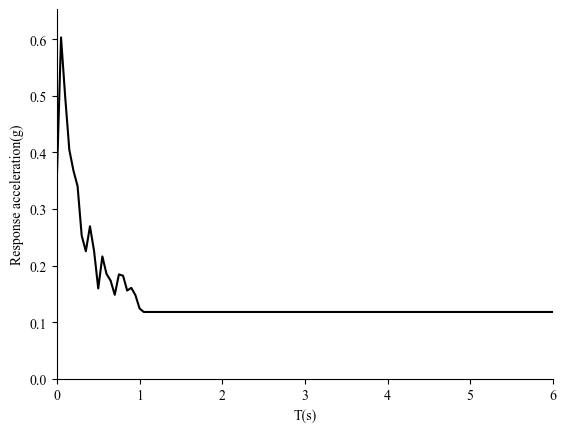

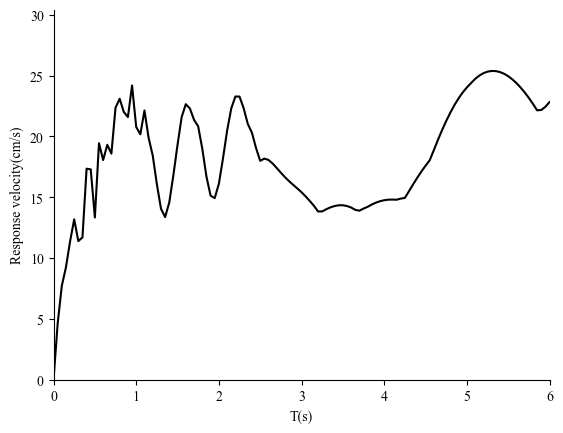

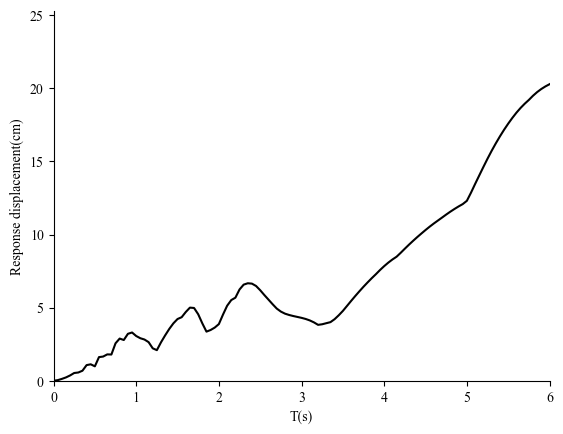

In [70]:
Response_spectrum(acc, dt)